In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## About Dataset

Avg. Session Length: Average session of in-store style advice sessions.

Time on App: Average time spent on App in minutes

Time on Website: Average time spent on Website in minutes

Length of Membership: How many years the customer has been a member.

In [2]:
df=pd.read_csv("Ecommerce Customers.csv")

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
#droping the Email Address and Avatatr columns

df.drop(['Email','Address','Avatar'],axis=1,inplace=True)
df.head()
#df.describe()
#df.columns
#df.columns.values

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


## Check for missing values
Missing values in the data results in poor model performance.

In [6]:
#checking for null values
df.isnull().sum()

Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

Our model has no missing values. But if we had missing values, we can deal with them in these main ways

- Getting rid of customers with a lot of missing values in their columns.

- Getting rid of the whole attribute or remove the whole column.

- Setting the missing values to some value (zero, the mean, the median, etc.).

## Multiple Linear Regression Assumptions

## Assumption 1 : There must be a linear relationship between our independent variables and the dependent variable

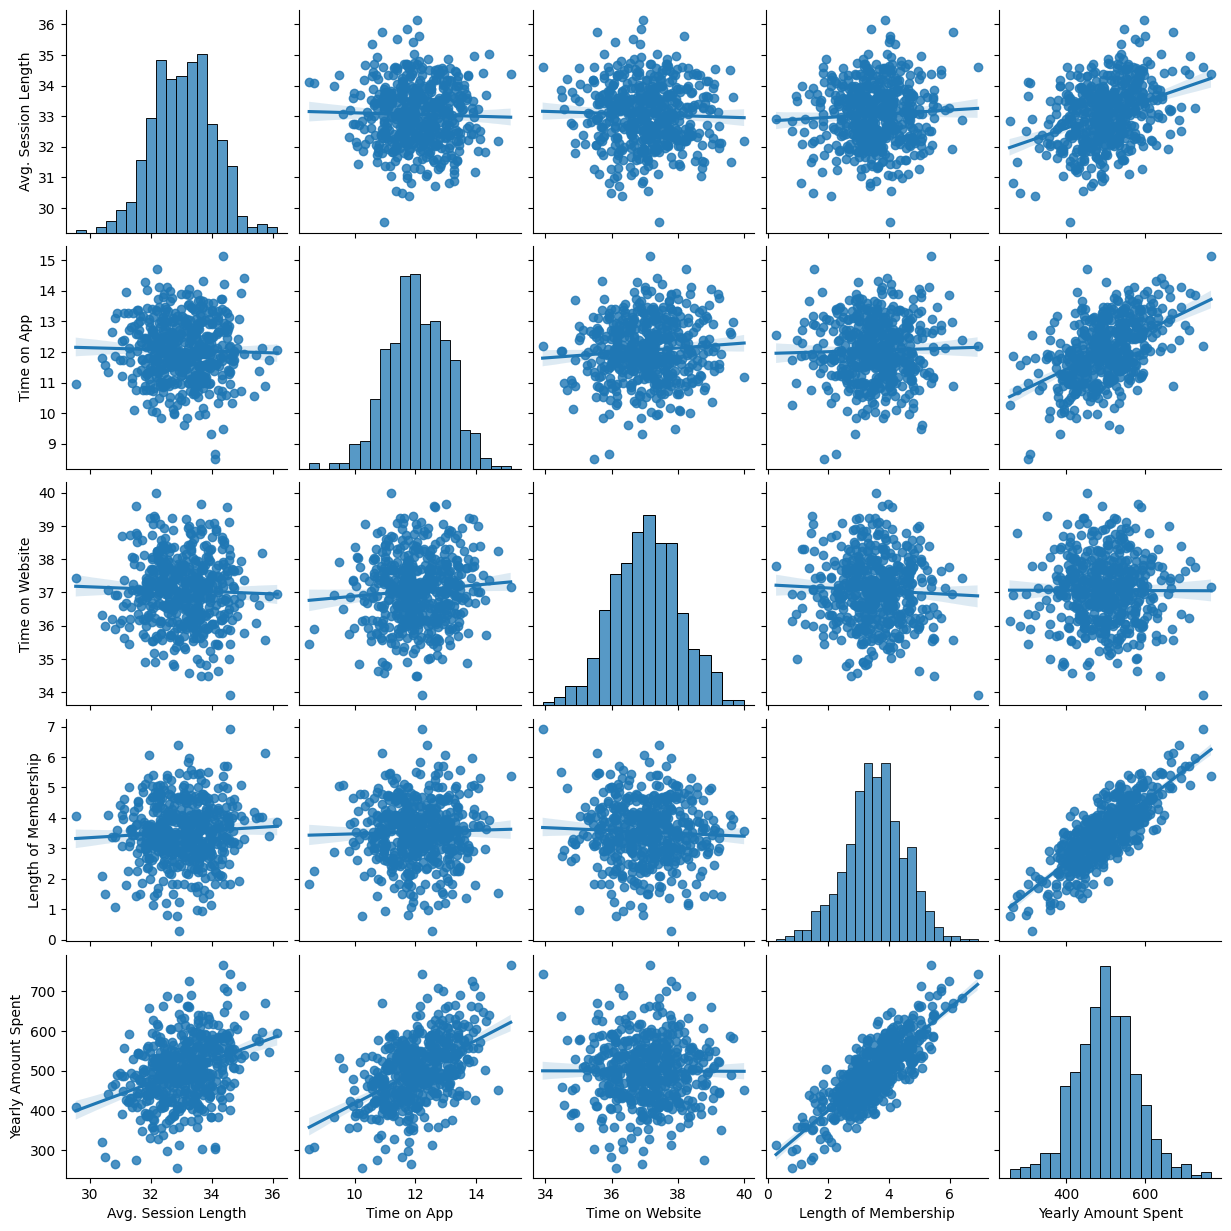

In [55]:
# create a scatter plot
sns.pairplot(df,kind='reg')

## Assumption 2 - Linear regression assumes that the error terms should be normally distributed

In linear regression, we assume that the differences between our predicted values and the actual observed values (residuals) are normally distributed. This means that when we plot these residuals in a histogram or a probability plot, they should resemble a bell-shaped curve.

- Residuals are Like Mistakes: Imagine you're trying to predict something using linear regression, like a person's salary based on their education and experience. The "residuals" are like the mistakes your prediction makes. The first assumption is that these mistakes (residuals) should look like a bell-shaped curve when you graph them. This curve is called a "normal distribution."

- Most Mistakes are Small: In this curve, most of the mistakes should be small and near the middle. That means your predictions are usually close to the real values.

In [7]:
correlation=df.corr()
continue_corr=correlation.loc[:,['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
continue_corr

,Avg. Session Length,Time on App,Time on Website,Length of Membership
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247
Time on App,-0.027826,1.000000,0.082388,0.029143
Time on Website,-0.034987,0.082388,1.000000,-0.047582
Length of Membership,0.060247,0.029143,-0.047582,1.000000
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084


In [8]:
correlation.loc['Length of Membership']

Avg. Session Length     0.060247
Time on App             0.029143
Time on Website        -0.047582
Length of Membership    1.000000
Yearly Amount Spent     0.809084
Name: Length of Membership, dtype: float64

Correlation with Yearly Amount Spent:
Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


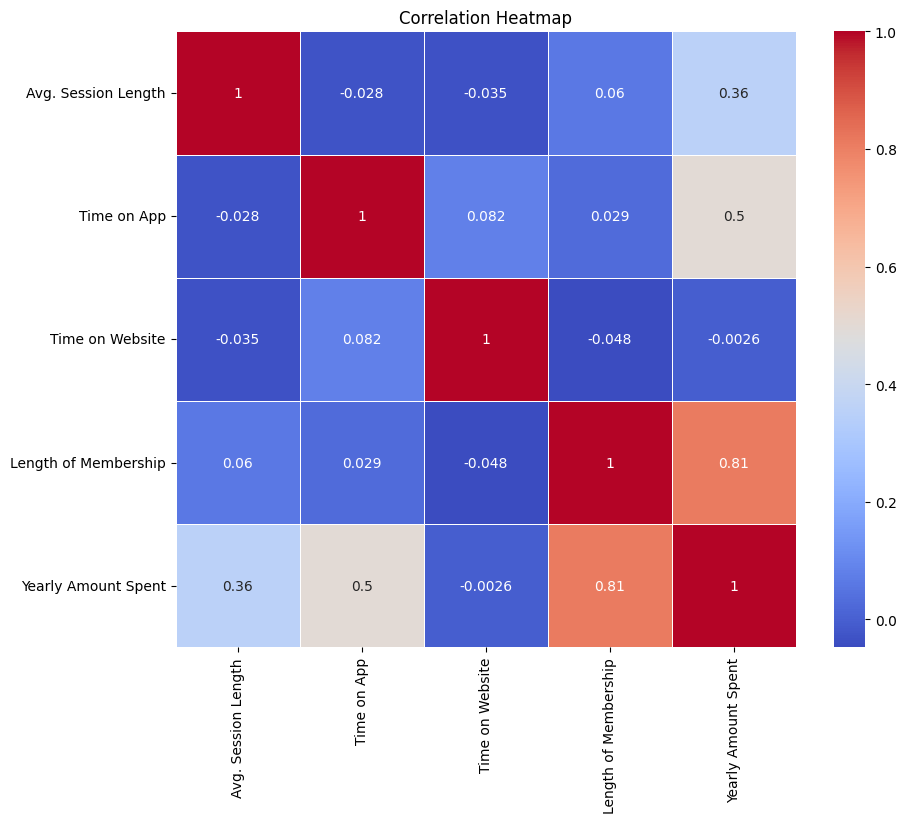

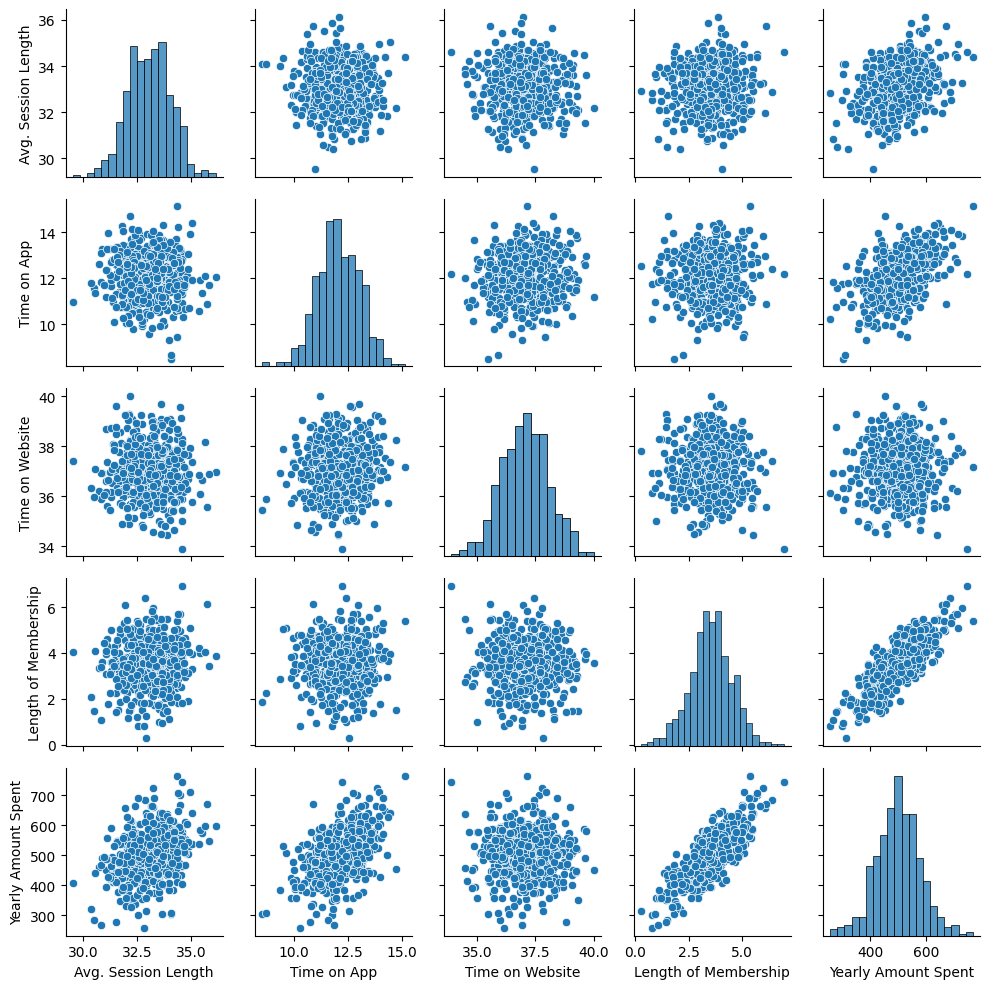

In [9]:
#how to know the independant variable that correlate with the  dependant variable
#suggestions?
# Correlation analysis
correlation_with_target = df.corr()['Yearly Amount Spent'].sort_values(ascending=False)
print("Correlation with Yearly Amount Spent:")
print(correlation_with_target)

# Visualize correlation using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot to visualize relationships between variables
sns.pairplot(df, height=2)
plt.tight_layout()
plt.show()



## Split the data into training and test sets using a standard 70/30  or 80/20 split.

 X_train - This includes your all independent variables,these will be used to train the model, also as we have specified the test_size = 0.2, this means 80% of observations from your complete data will be used to train/fit the model and rest 20% will be used to test the model.

X_test - This is remaining 20% portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.

 y_train - This is your dependent variable which needs to be predicted by this model, this includes category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.

 y_test - This data has category labels for your test data, these labels will be used to test the accuracy between actual and predicted categories.

# splitting the data into dependant and independant variables

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# dependant variable and the independant variable
x=df.drop(['Yearly Amount Spent'],axis=1)

In [12]:
x.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [13]:
y=df['Yearly Amount Spent']

In [14]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [15]:
#splitting the data into train and test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [16]:
x.shape

(500, 4)

In [17]:
x_train.shape

(400, 4)

In [18]:
y_train.shape

(400,)

# NORMALIZING THE DATA

In [19]:
#sclaling the columns

from sklearn.preprocessing import StandardScaler


In [20]:
scaler=StandardScaler()

In [21]:
scaler

StandardScaler()

In [22]:
x_train=scaler.fit_transform(x_train)

In [23]:
x_test=scaler.transform(x_test)

# CREATING THE MODEL

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model_yearly_spent=LinearRegression()

In [26]:
model_yearly_spent.fit(x_train,y_train)

LinearRegression()

In [27]:
prediction=model_yearly_spent.predict(x_test)

In [28]:
#predicting my values


In [29]:
prediction

array([402.86230057, 542.53325699, 426.62011885, 501.91386356,
       409.6666551 , 569.92155028, 531.50423545, 505.9430922 ,
       408.10378587, 473.45942926, 441.18668799, 424.5246348 ,
       424.83341708, 527.1206153 , 430.87985559, 423.47062036,
       575.87515158, 484.65633286, 457.77896999, 481.58742323,
       501.56110987, 513.12815204, 507.49166902, 646.6337734 ,
       449.70050598, 496.26290483, 556.18523772, 554.78684176,
       399.15827822, 325.16921297, 532.62732674, 477.73025394,
       500.76491543, 305.09971367, 505.4681192 , 483.52069434,
       519.09464127, 437.75549728, 456.25005223, 470.63517887,
       494.11207815, 444.65549261, 508.57079733, 500.88197487,
       488.35128708, 535.34025214, 594.58301787, 513.59474399,
       279.69877679, 432.71590808, 421.06976167, 480.94327504,
       584.59481871, 608.61734067, 564.42312999, 494.47224491,
       393.9559332 , 456.11321347, 572.92228418, 499.27385679,
       512.4297352 , 391.5617032 , 479.60705887, 481.05

In [30]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
347    593.156402
86     487.379306
75     478.719357
438    392.992256
15     461.780742
Name: Yearly Amount Spent, Length: 100, dtype: float64

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy=r2_score(y_test,prediction)

In [34]:
accuracy

0.9778130629248283

In [35]:
#the intercept show it in 

model_yearly_spent.intercept_

np.float64(501.9921512135001)

####that means that the minimum amount expected for a customer  yearly amount spent is 501 dollars

In [36]:
#coefficients of the model

model_yearly_spent.coef_

array([25.25038131, 38.70350139,  0.31546925, 63.54321107])

In [37]:
# decribe .t

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [38]:
x.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [39]:
coef=pd.DataFrame(model_yearly_spent.coef_,x.columns,columns=['coefficient'])
coef

,coefficient
Avg. Session Length,25.250381
Time on App,38.703501
Time on Website,0.315469
Length of Membership,63.543211


In [40]:
from sklearn import metrics


In [41]:
predictions=model_yearly_spent.predict(x_test)
predictions

array([402.86230057, 542.53325699, 426.62011885, 501.91386356,
       409.6666551 , 569.92155028, 531.50423545, 505.9430922 ,
       408.10378587, 473.45942926, 441.18668799, 424.5246348 ,
       424.83341708, 527.1206153 , 430.87985559, 423.47062036,
       575.87515158, 484.65633286, 457.77896999, 481.58742323,
       501.56110987, 513.12815204, 507.49166902, 646.6337734 ,
       449.70050598, 496.26290483, 556.18523772, 554.78684176,
       399.15827822, 325.16921297, 532.62732674, 477.73025394,
       500.76491543, 305.09971367, 505.4681192 , 483.52069434,
       519.09464127, 437.75549728, 456.25005223, 470.63517887,
       494.11207815, 444.65549261, 508.57079733, 500.88197487,
       488.35128708, 535.34025214, 594.58301787, 513.59474399,
       279.69877679, 432.71590808, 421.06976167, 480.94327504,
       584.59481871, 608.61734067, 564.42312999, 494.47224491,
       393.9559332 , 456.11321347, 572.92228418, 499.27385679,
       512.4297352 , 391.5617032 , 479.60705887, 481.05

In [42]:
#metrics mean absolute error

metrics.mean_absolute_error(y_test,predictions)

np.float64(8.558441887438093)

In [43]:
metrics.mean_squared_error(y_test,predictions)

np.float64(109.8637411521613)

In [44]:
metrics.median_absolute_error(y_test,predictions)

np.float64(7.3243967354370625)

In [45]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

np.float64(10.481590583120546)

In [46]:
import joblib
joblib.dump(model_yearly_spent,"linearmodel.pkl")

['linearmodel.pkl']

In [47]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [48]:
# # Feature importance using Random Forest
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.feature_selection import SelectFromModel

# rf = RandomForestRegressor(n_estimators=100, random_state=42)
# rf.fit(x, y)

# feature_importance = pd.DataFrame({'feature': x.columns, 'importance': rf.feature_importances_})
# feature_importance = feature_importance.sort_values('importance', ascending=False)
# print("\nFeature Importance:")
# print(feature_importance)

# # Visualize feature importance
# plt.figure(figsize=(10, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Feature Importance')
# plt.show()

In [49]:
# # Scatter plots for each independent variable vs. the dependent variable
# for column in df.columns:
#     if column != 'Yearly Amount Spent':
#         plt.figure(figsize=(10, 6))
#         sns.scatterplot(data=df, x=column, y='Yearly Amount Spent')
#         plt.title(f'{column} vs Yearly Amount Spent')
#         plt.show()

In [50]:
# # checking for duplicates


# import streamlit as st
# import joblib
# import numpy as np

# # Load the trained model
# model = joblib.load('model.pkl')

# # Define the Streamlit app
# def main():
#     st.title('Machine Learning Prediction App')

#     # Input fields for user data
#     gender = st.selectbox('Gender', ['Male', 'Female'])
#     job_rate = st.number_input('Job Rate', min_value=0.0, max_value=10.0)
#     overtime_hours = st.number_input('Overtime Hours', min_value=0, max_value=100)
#     years = st.number_input('Years', min_value=0, max_value=50)

#     # Convert Gender to binary
#     gender_binary = 1 if gender == 'Male' else 0

#     # Create input array
#     input_data = np.array([[gender_binary, job_rate, overtime_hours, years]])

#     # Make prediction
#     if st.button('Predict'):
#         prediction = model.predict(input_data)
#         st.write(f'Prediction: {prediction[0]}')

# if __name__ == '__main__':
#     main()


In [51]:
# import streamlit as st
# import joblib
# import numpy as np

# # Load the trained model
# model = joblib.load('model.pkl')

# # Define the Streamlit app
# def main():
#     st.title('Yearly Amount Spent Prediction App')

#     st.write("""
#     ### Enter the values for the features to get the prediction:
#     """)

#     # Input fields for user data
#     avg_session_length = st.slider('Avg. Session Length', 29.532429, 36.139662, 33.053194)
#     time_on_app = st.slider('Time on App', 8.508152, 15.126994, 12.052488)
#     time_on_website = st.slider('Time on Website', 33.913847, 40.005182, 37.060445)
#     length_of_membership = st.slider('Length of Membership', 0.269901, 6.922689, 3.533462)

#     # Create input array
#     input_data = np.array([[avg_session_length, time_on_app, time_on_website, length_of_membership]])

#     # Make prediction
#     if st.button('Predict'):
#         prediction = model.predict(input_data)
#         st.write(f'Predicted Yearly Amount Spent: ${prediction[0]:.2f}')

# if __name__ == '__main__':
#     main()


In [52]:
# import streamlit as st
# import joblib
# import numpy as np

# # Load the trained model
# model_yearly_spent = joblib.load('linearmodel.pkl')

# # Define the Streamlit app
# def main():
#     st.title('Yearly Amount Spent Prediction App')

#     st.write("""
#     ### Enter the values for the features to get the prediction:
#     """)

#     # Input fields for user data
#     avg_session_length = st.slider('Avg. Session Length', 29.532429, 36.139662, 33.053194)
#     time_on_app = st.slider('Time on App', 8.508152, 15.126994, 12.052488)
#     time_on_website = st.slider('Time on Website', 33.913847, 40.005182, 37.060445)
#     length_of_membership = st.slider('Length of Membership', 0.269901, 6.922689, 3.533462)

#     # Create input array
#     input_data = np.array([[avg_session_length, time_on_app, time_on_website, length_of_membership]])

#     # Make prediction
#     if st.button('Predict'):
#         prediction = model_yearly_spent.predict(input_data)
#         st.write(f'Predicted Yearly Amount Spent: ${prediction[0]:.2f}')

# if __name__ == '__main__':
#     main()


#fancy

In [53]:
# import streamlit as st
# import joblib
# import numpy as np

# # Load the trained model
# model_yearly_spent = joblib.load('linearmodel.pkl')

# # Define the Streamlit app
# def main():
#     st.set_page_config(
#         page_title="Yearly Amount Spent Prediction",
#         page_icon="💸",
#         layout="wide",
#         initial_sidebar_state="expanded",
#     )

#     # Sidebar
#     st.sidebar.header('Input Features')
#     st.sidebar.write("Adjust the values to get the prediction.")

#     # Input fields for user data in the sidebar
#     avg_session_length = st.sidebar.slider('Avg. Session Length', 29.532429, 36.139662, 33.053194)
#     time_on_app = st.sidebar.slider('Time on App', 8.508152, 15.126994, 12.052488)
#     time_on_website = st.sidebar.slider('Time on Website', 33.913847, 40.005182, 37.060445)
#     length_of_membership = st.sidebar.slider('Length of Membership', 0.269901, 6.922689, 3.533462)

#     # Main panel
#     st.title('💸 Yearly Amount Spent Prediction App 💸')

#     st.markdown("""
#     Welcome to the **Yearly Amount Spent Prediction App**! Adjust the sliders on the sidebar to set the values for the features, and click the **Predict** button to see the predicted yearly amount spent.
#     """)

#     # Create input array
#     input_data = np.array([[avg_session_length, time_on_app, time_on_website, length_of_membership]])

#     # Make prediction
#     if st.button('Predict'):
#         prediction = model_yearly_spent.predict(input_data)
#         st.success(f'Predicted Yearly Amount Spent: **${prediction[0]:.2f}**')

#     # Display a fancy image (if required)
#     st.image('https://www.yourimageurl.com/path/to/image.jpg', use_column_width=True)

# if __name__ == '__main__':
#     main()
